In [1]:
!nvidia-smi

Sun Nov 24 12:34:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.03                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3             12W /   35W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\bhavy\OneDrive\Desktop\assignment


## Install YOLO11 via Ultralytics

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36  Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Setup complete  (16 CPUs, 15.2 GB RAM, 207.1/294.7 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [3]:
%mkdir {HOME}/datasets
%cd {HOME}/datasets
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RMpcn7aeZFmzLmgwjtGl")
project = rf.workspace("dev-mdtnd").project("pallet-detecction")
version = project.version(1)
dataset = version.download("yolov11")
                

[WinError 2] The system cannot find the file specified: 'c:\\Users\\bhavy\\OneDrive\\Desktop\\assignment/datasets'
c:\Users\bhavy\OneDrive\Desktop\assignment


The syntax of the command is incorrect.
C:\Users\bhavy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pallet-detecction-1 in yolov11:: 100%|██████████| 2502/2502 [00:01<00:00, 1915.70it/s]


## Custom Training

In [1]:
# %cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data=datasets/data.yaml epochs=75 imgsz=640 plots=True device=0 save_period = 2 

Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=datasets/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru


train: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\train\labels.cache... 1089 images, 72 backgrounds, 0 corrupt: 100%|██████████| 1089/1089 [00:00<?, ?it/s]
train: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\train\labels.cache... 1089 images, 72 backgrounds, 0 corrupt: 100%|██████████| 1089/1089 [00:00<?, ?it/s]

val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]
       1/75      4.19G      1.276      4.012      1.496         84        640:   0%|          | 0/69 [00:01<?, ?it/s]
       1/75      4.19G      1.276      4.012      1.496         84        640:   1%|▏         | 1/69 [00:01<02:02,  1.80s/it]
       1/75      4.19G      1.

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


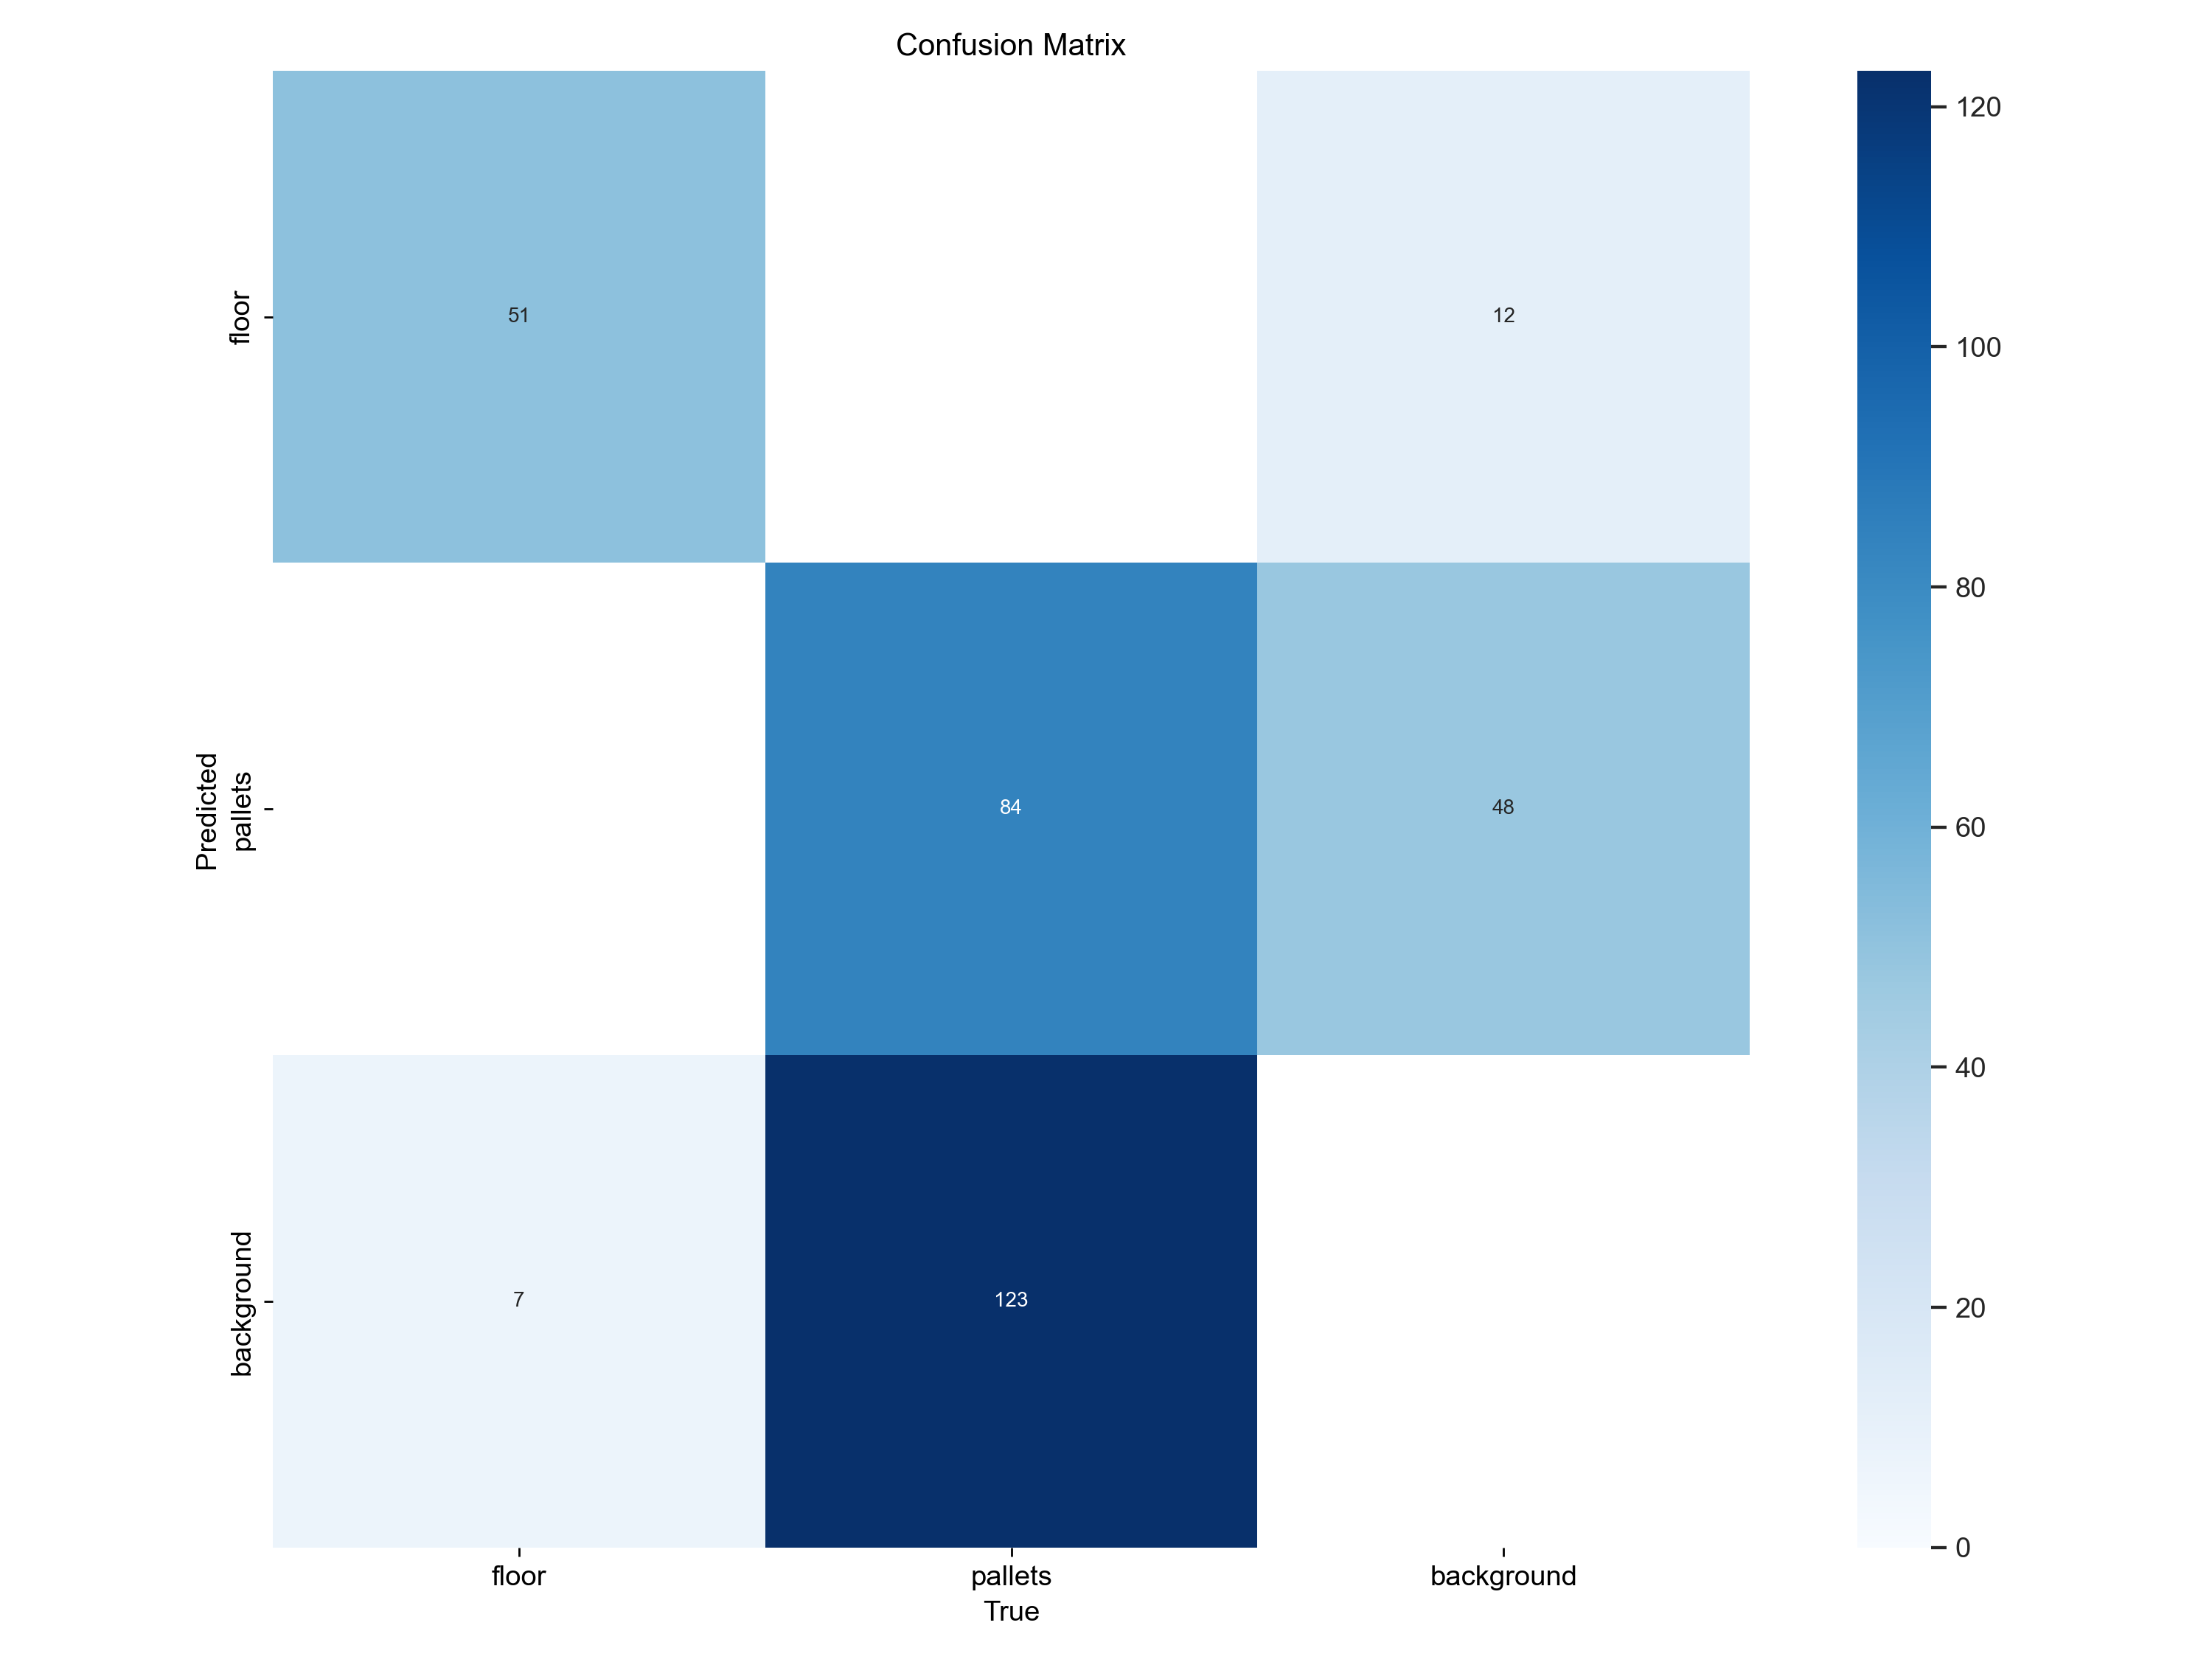

In [3]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

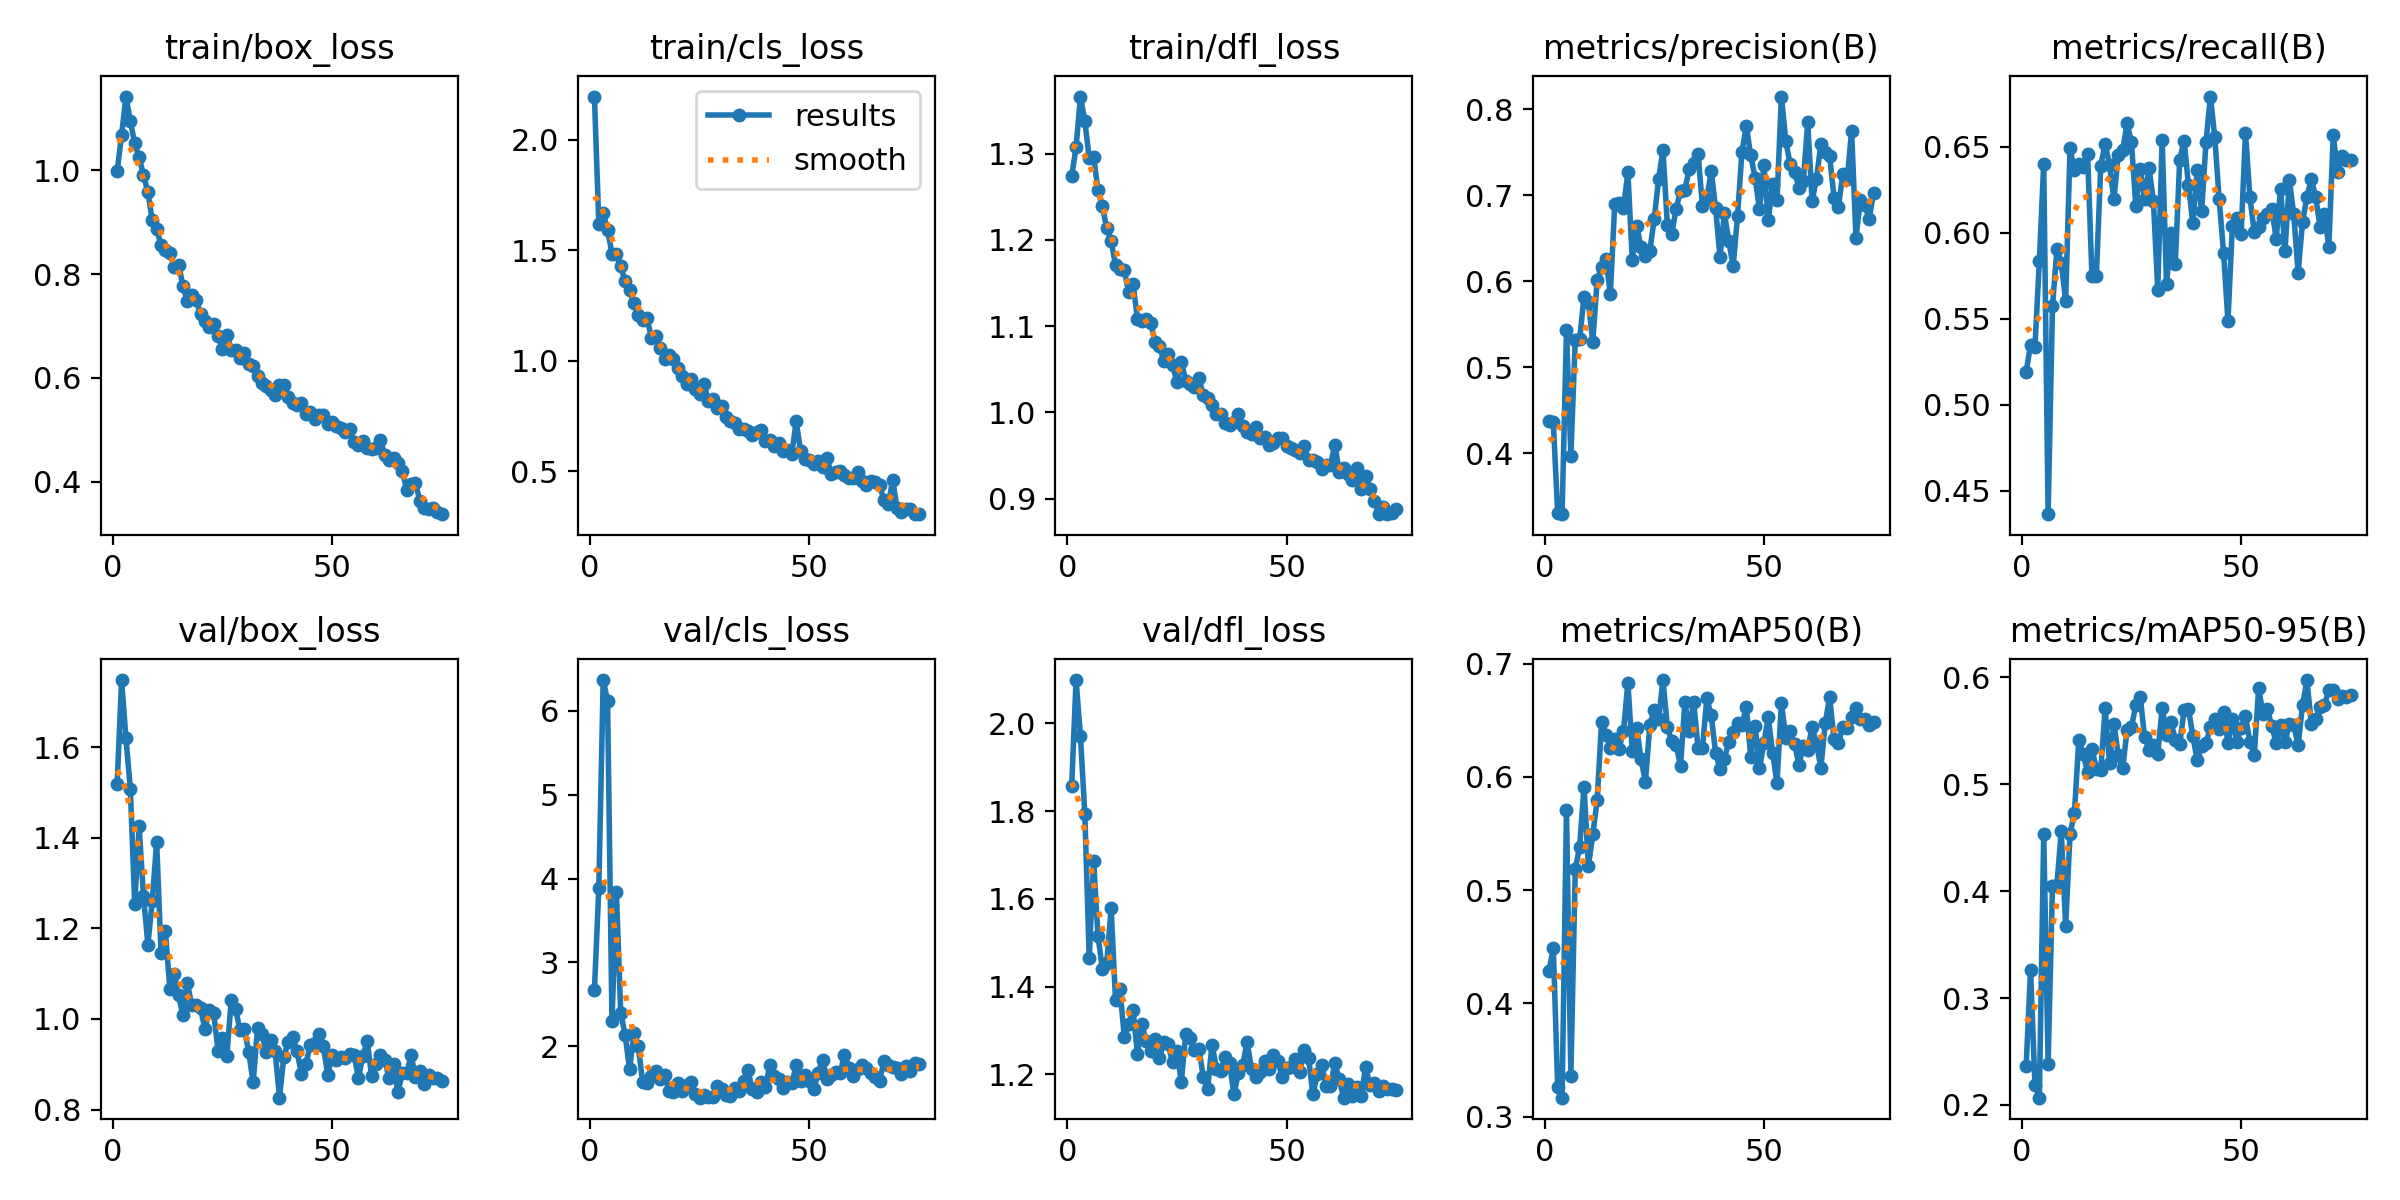

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train2/results.png', width=600)

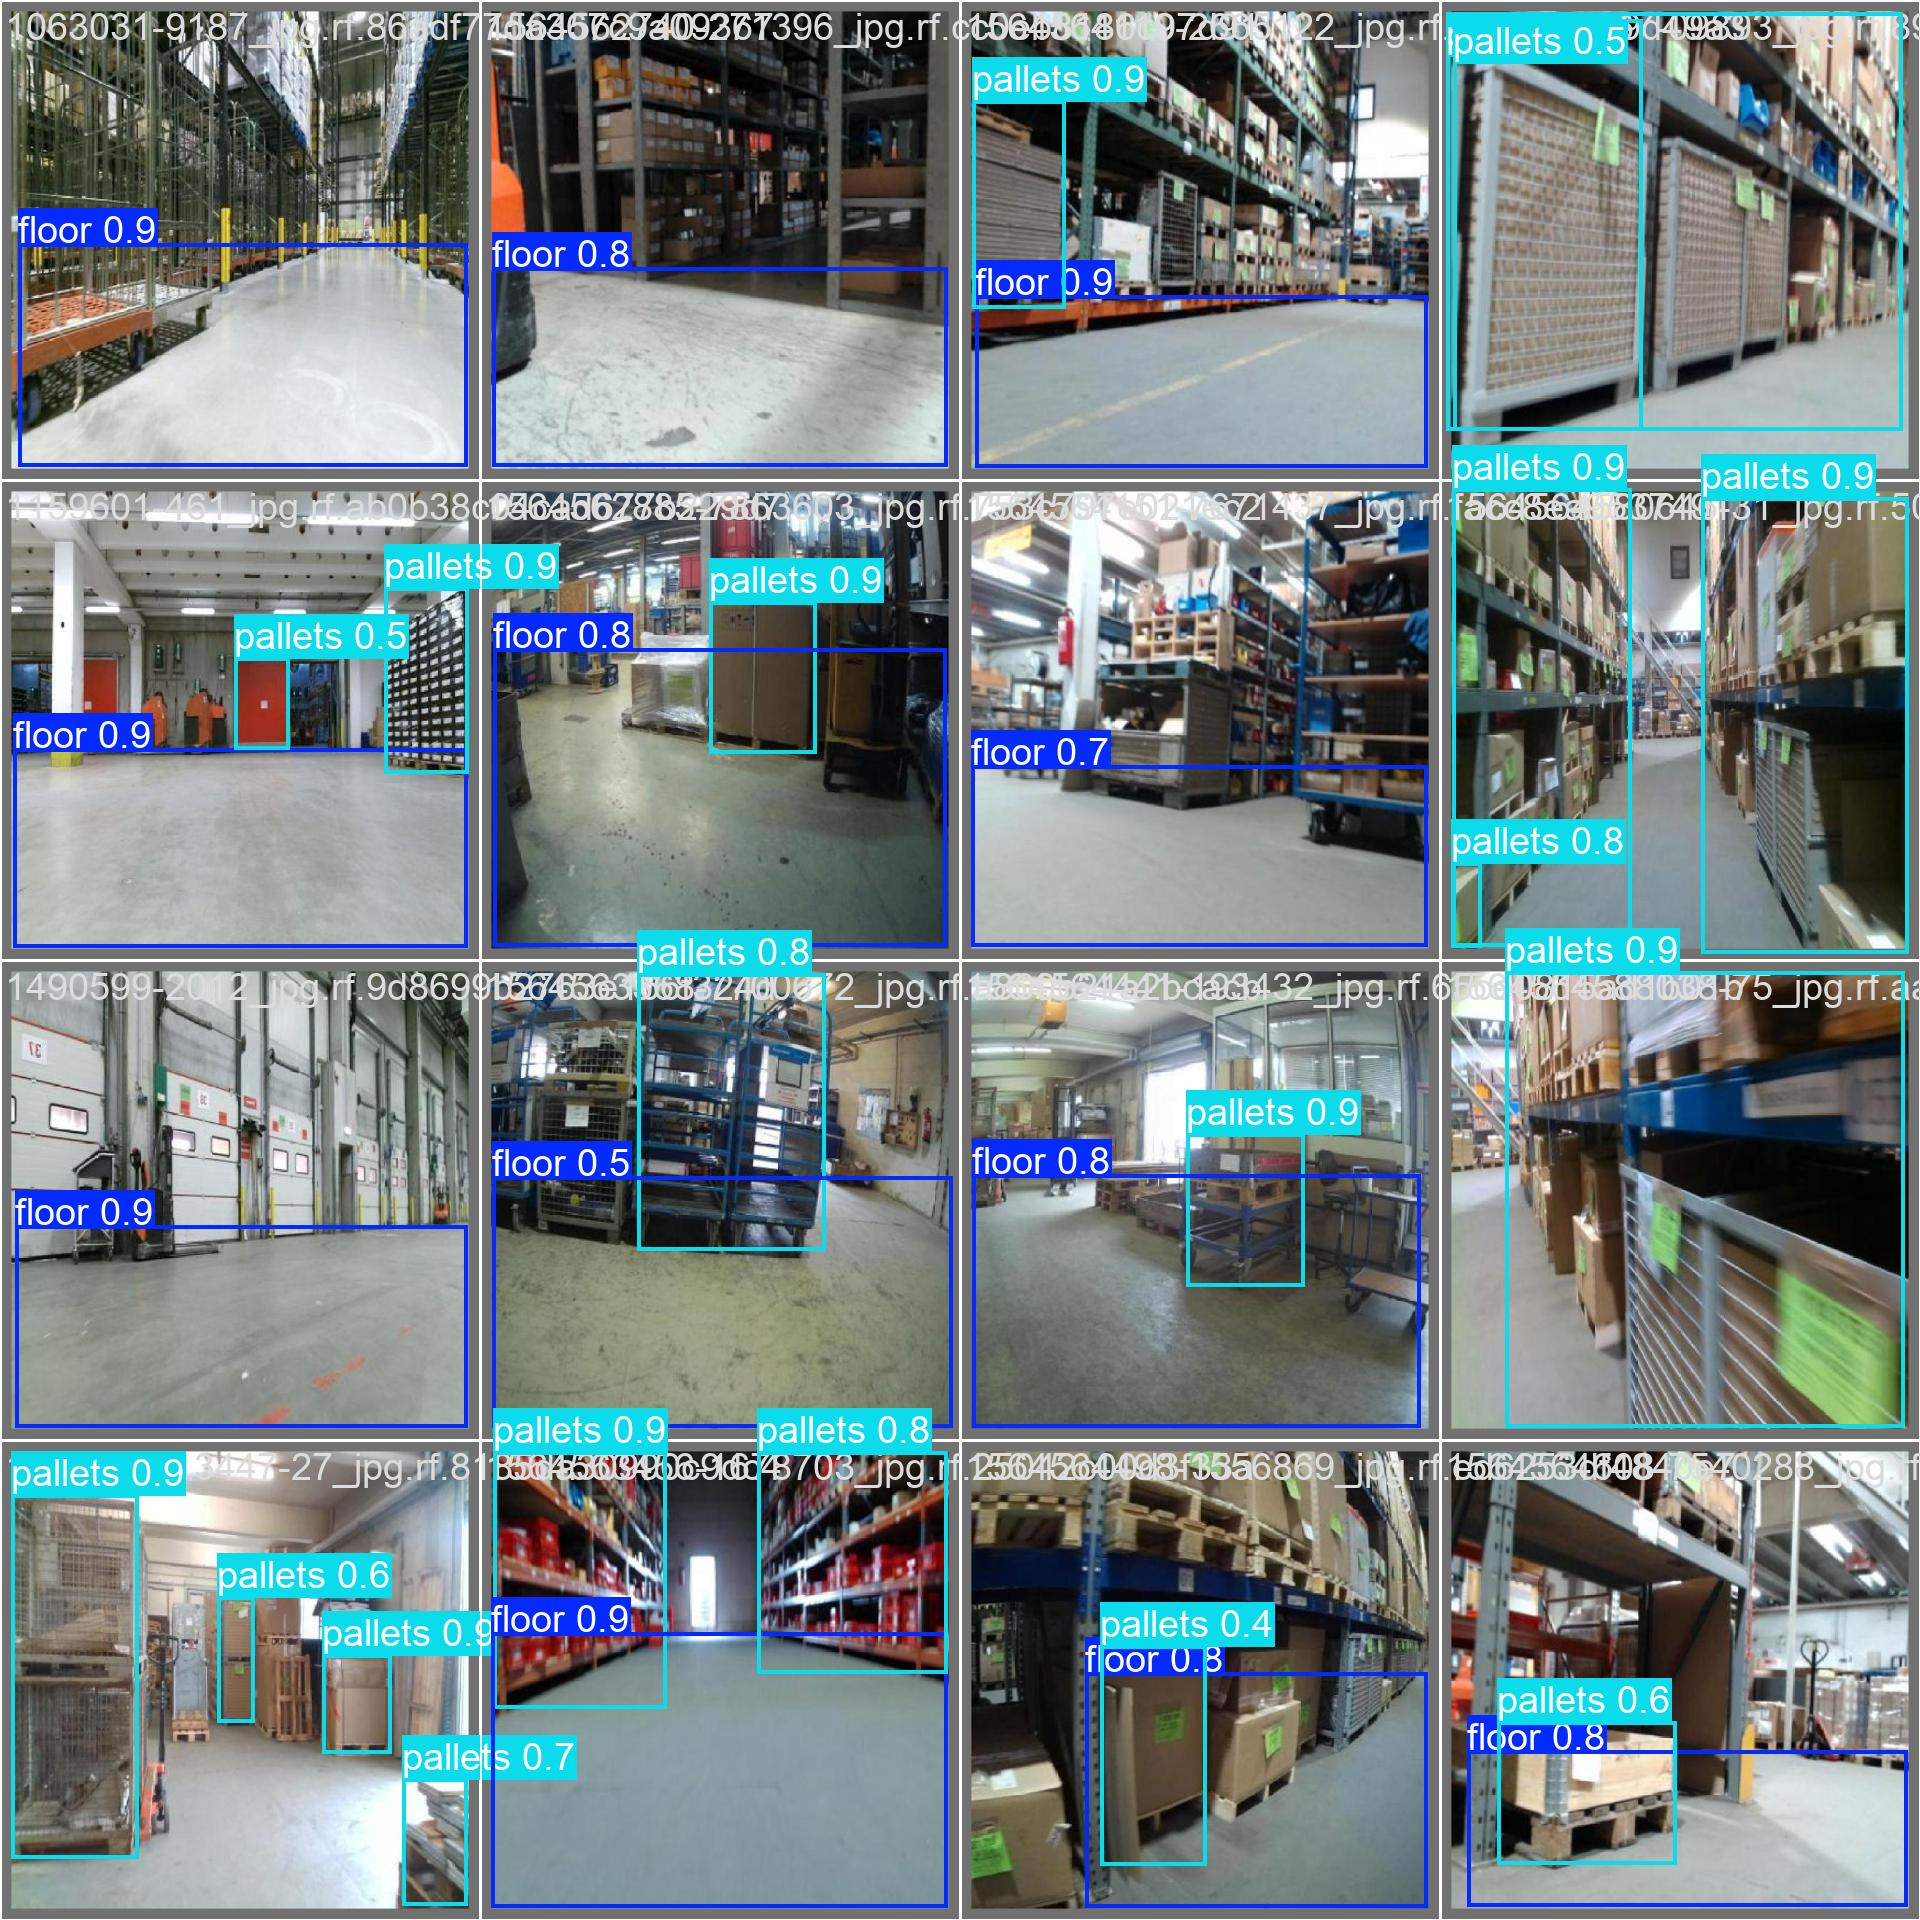

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=datasets/data.yaml

Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
                   all        104        265      0.752      0.622      0.686      0.613
                 floor         53         58      0.856      0.845      0.906      0.879
               pallets         93        207      0.648        0.4      0.467      0.347
Speed: 1.5ms preprocess, 10.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\val3
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:04,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:01<00:02,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:01<00:01,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:01<00:00,  

## Inference with custom model

In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source=datasets/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1211768-1132_jpg.rf.8533d9d12bbab1d0c4f1d891cfe97d4b.jpg: 640x640 1 floor, 3 palletss, 8.4ms
image 2/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564562642-7408607_jpg.rf.5ad2e542c95ec62c5352559aa064b20c.jpg: 640x640 2 palletss, 8.8ms
image 3/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564562913-2493865_jpg.rf.eceaba8e04fc09a5073acafbf3ce035e.jpg: 640x640 5 palletss, 7.6ms
image 4/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564563112-631914_jpg.rf.e752ae4d4c6e14d80e8f0777dfc58280.jpg: 640x640 1 floor, 3 palletss, 9.0ms
image 5/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564564238-002053_jpg.rf.8adb92a7380b95b26d1a3ef293a75ac8.jpg: 

**NOTE:** Let's take a look at few results.

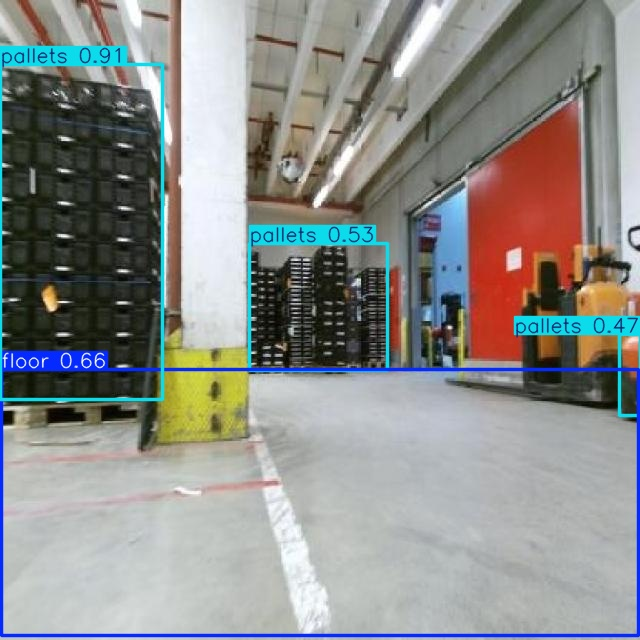

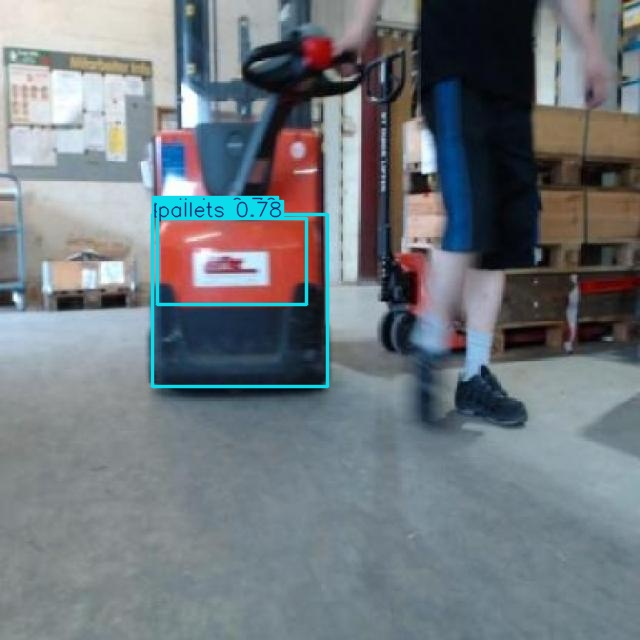

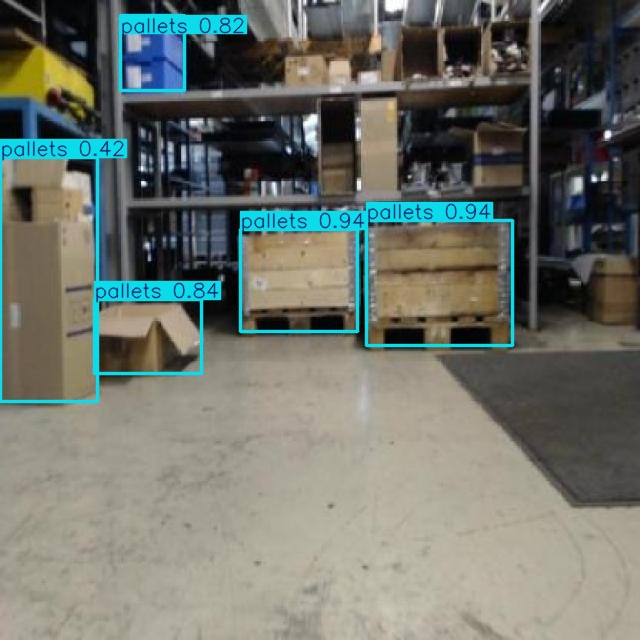

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [4]:
%pip install pickleshare

Note: you may need to restart the kernel to use updated packages.


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data=datasets/data.yaml epochs=75 imgsz=640 plots=True save_period=2 device=0

c:\Users\bhavy\OneDrive\Desktop\assignment
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=datasets/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm


train: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\train\labels.cache... 1089 images, 72 backgrounds, 0 corrupt: 100%|██████████| 1089/1089 [00:00<?, ?it/s]
train: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\train\labels.cache... 1089 images, 72 backgrounds, 0 corrupt: 100%|██████████| 1089/1089 [00:00<?, ?it/s]

val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]
       1/75      5.14G        1.3      5.669      3.505       1.49         84        640:   0%|          | 0/69 [00:02<?, ?it/s]
       1/75      5.14G        1.3      5.669      3.505       1.49         84        640:   1%|▏         | 1/69 [00:02<02:29,  2.20s/it]
       1

In [ ]:
!ls {HOME}/runs/segment/train/

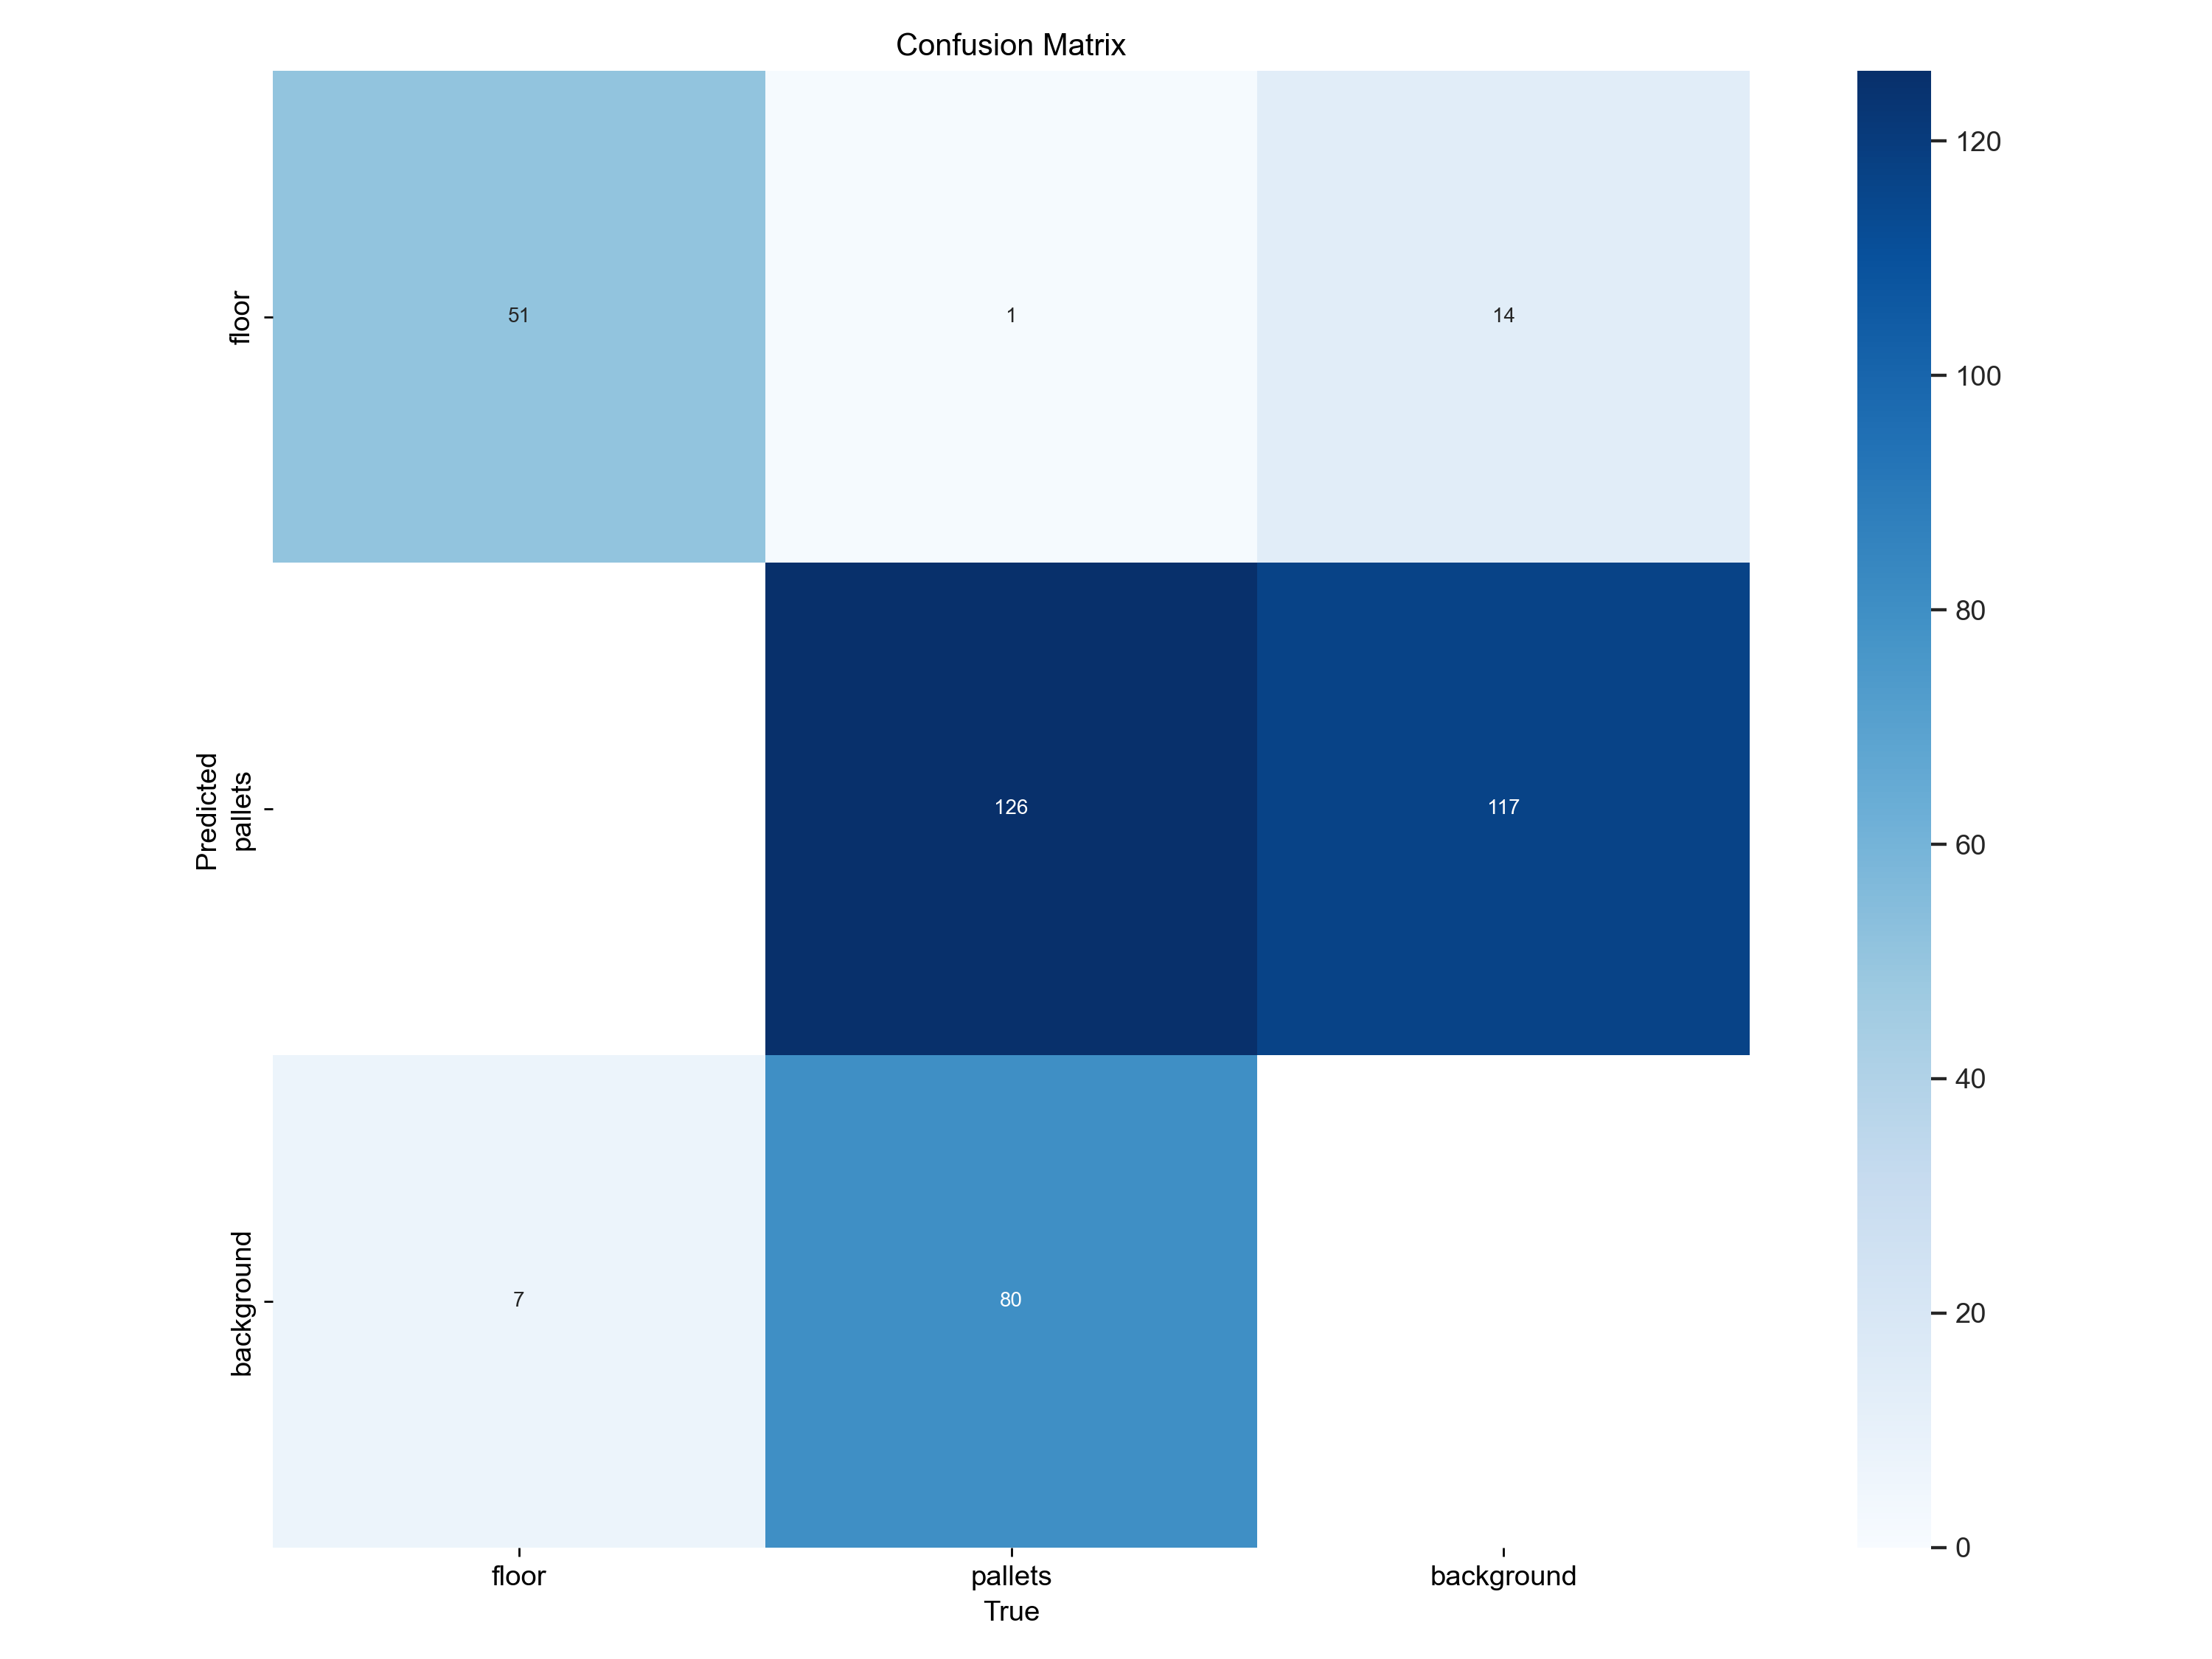

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=600)

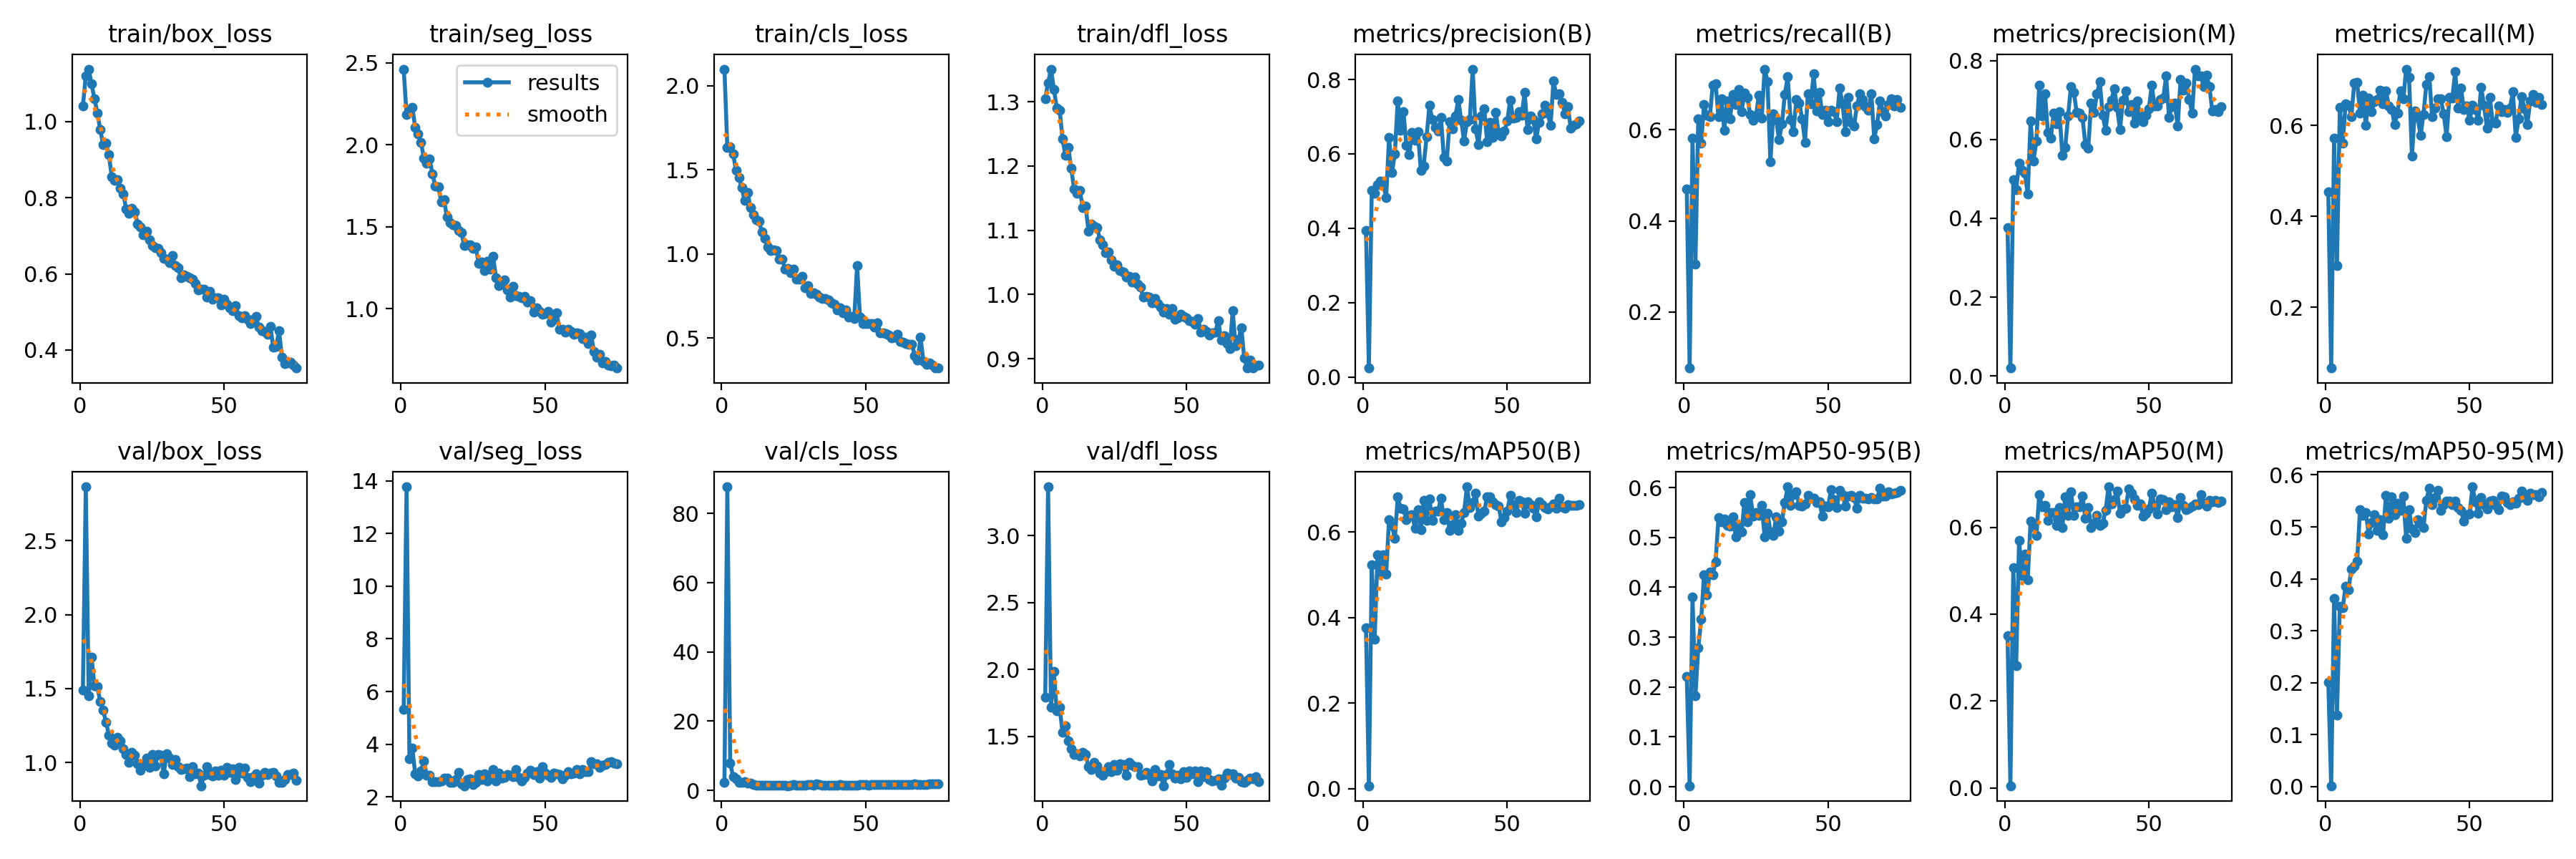

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

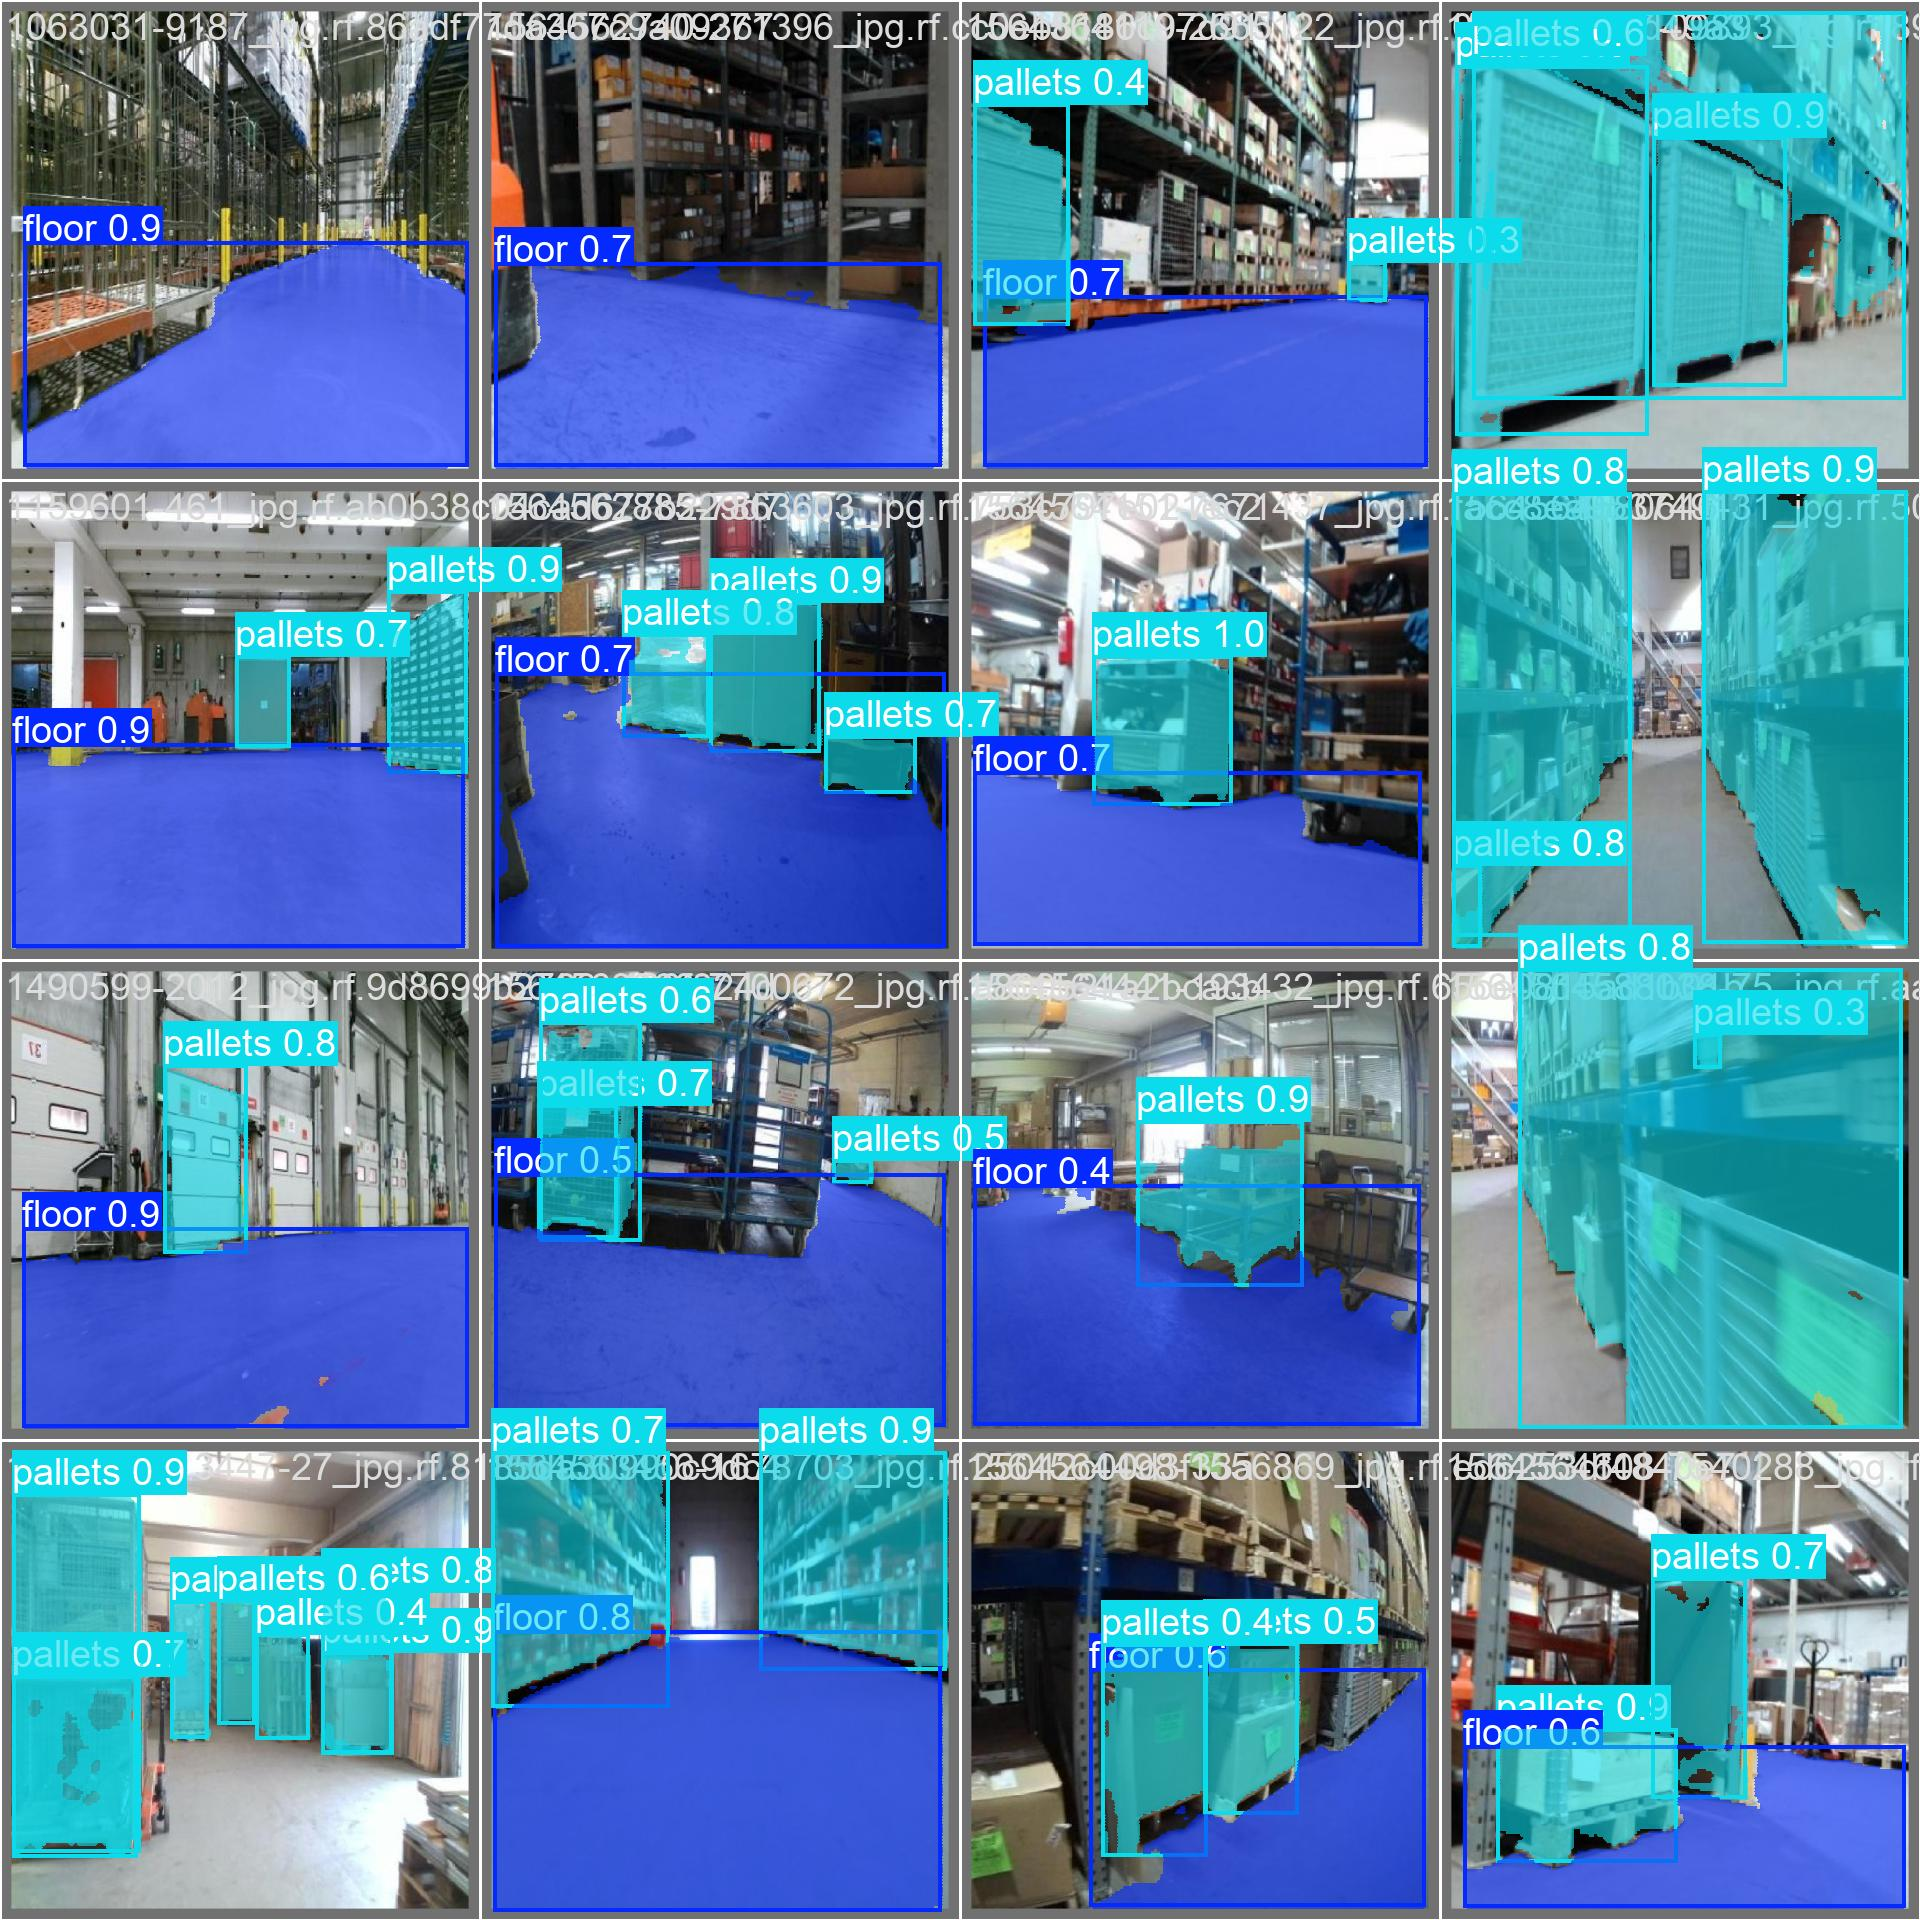

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data=datasets/data.yaml

Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
                   all        104        265      0.686      0.716      0.706      0.603      0.684      0.706      0.693      0.573
                 floor         53         58      0.806      0.858      0.868      0.808      0.805      0.852      0.868      0.811
               pallets         93        207      0.566      0.575      0.544      0.397      0.562       0.56      0.519      0.335
Speed: 1.6ms preprocess, 10.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs\segment\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
val: Scanning C:\Users\bhavy\OneDrive\Desktop\assignment\datasets\valid\labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:03,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:01<00:02,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-9

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.6 source=datasets/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1211768-1132_jpg.rf.8533d9d12bbab1d0c4f1d891cfe97d4b.jpg: 640x640 (no detections), 8.3ms
image 2/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564562642-7408607_jpg.rf.5ad2e542c95ec62c5352559aa064b20c.jpg: 640x640 1 pallets, 10.1ms
image 3/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564562913-2493865_jpg.rf.eceaba8e04fc09a5073acafbf3ce035e.jpg: 640x640 3 palletss, 4.6ms
image 4/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564563112-631914_jpg.rf.e752ae4d4c6e14d80e8f0777dfc58280.jpg: 640x640 (no detections), 19.3ms
image 5/52 c:\Users\bhavy\OneDrive\Desktop\assignment\datasets\test\images\1564564238-002053_jpg.rf.8adb92a7380b95b26d1a3ef293a75ac8.jpg: 64

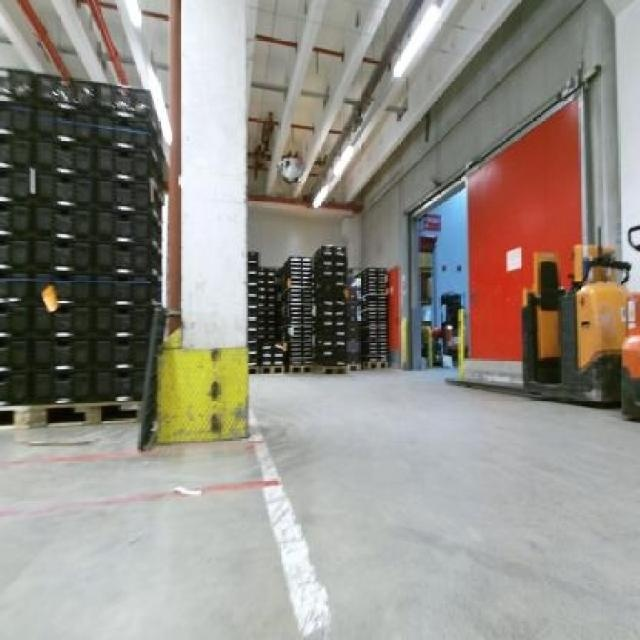

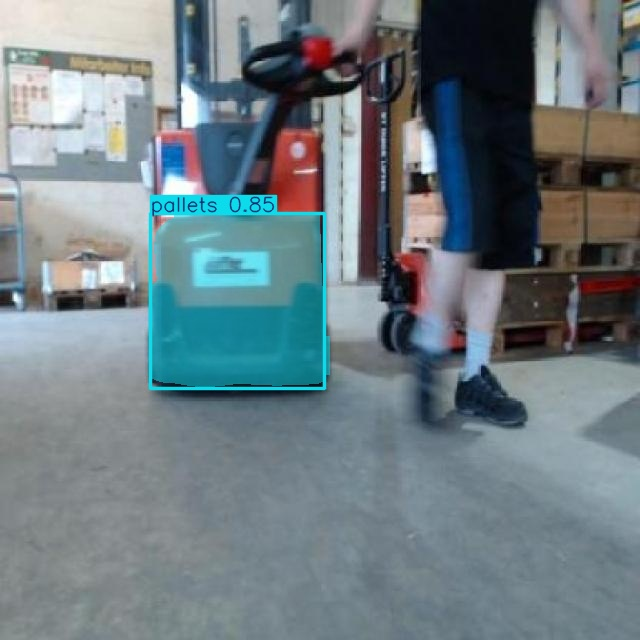

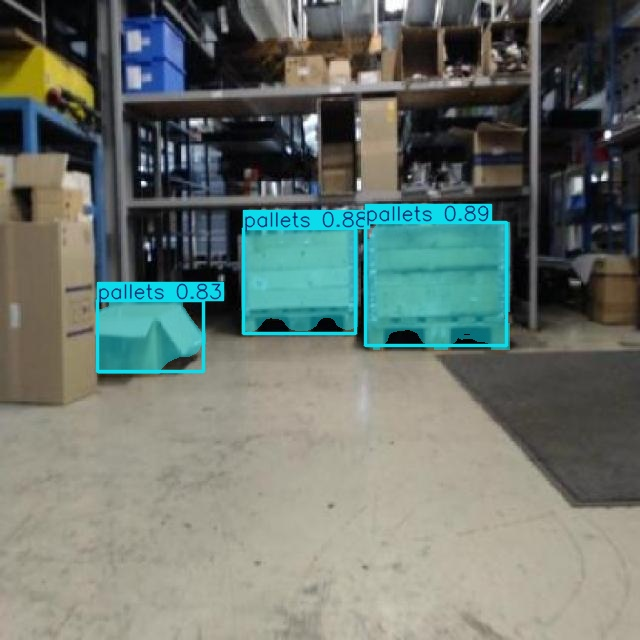

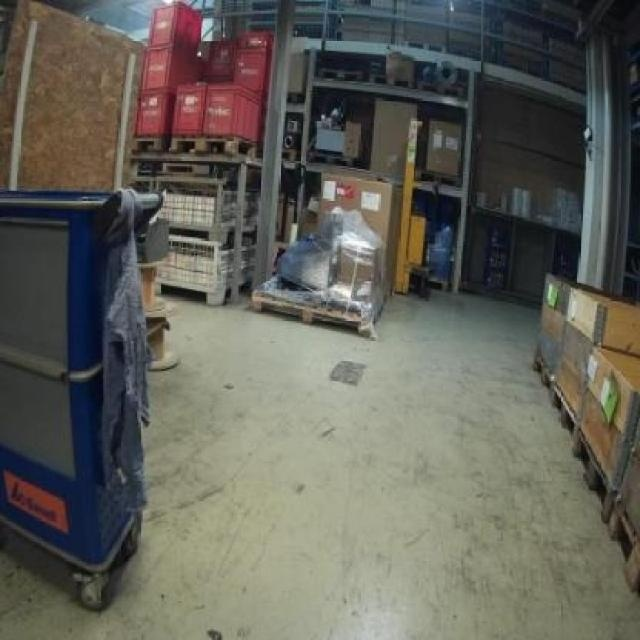

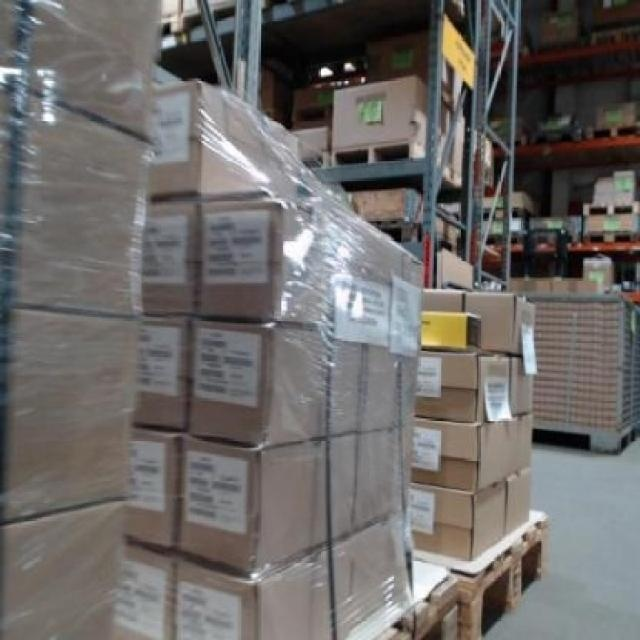

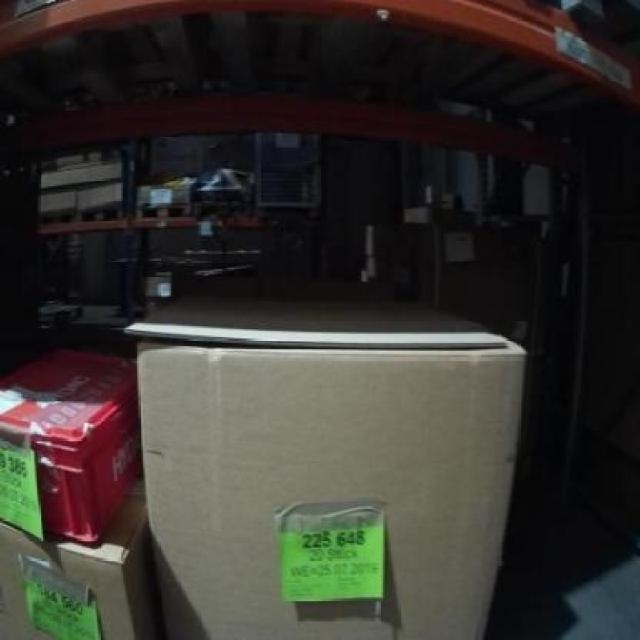

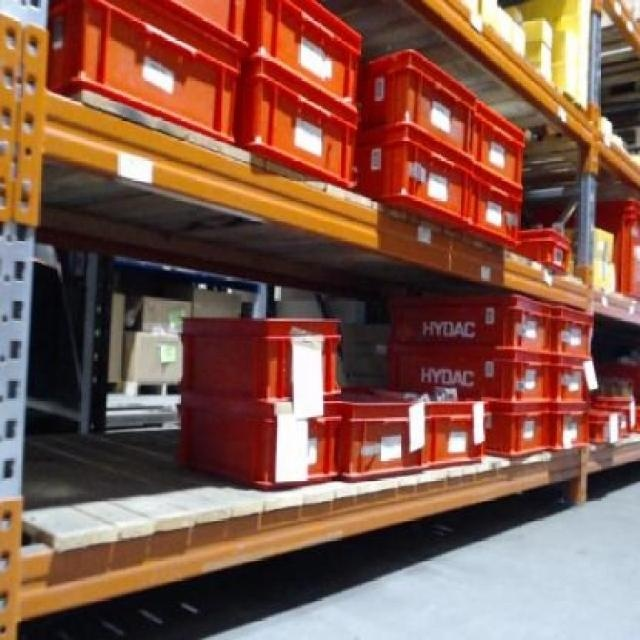

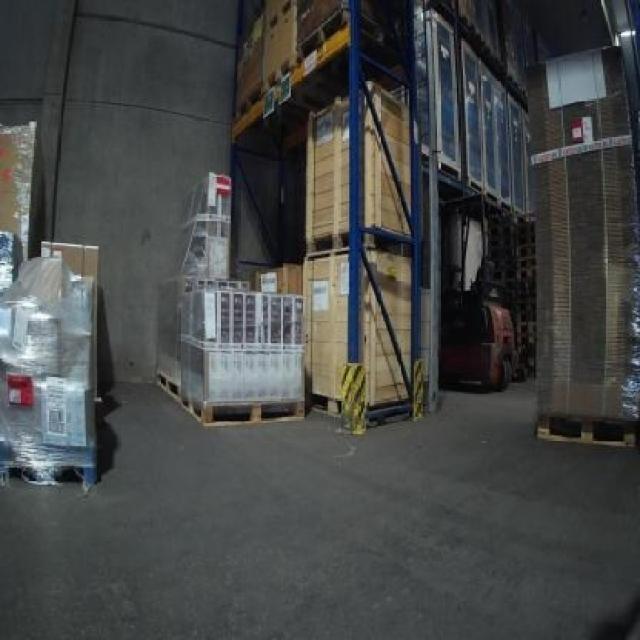

In [19]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [6]:
!pip install onnx


  Using cached onnx-1.17.0-cp311-cp311-win_amd64.whl.metadata (16 kB)
Using cached onnx-1.17.0-cp311-cp311-win_amd64.whl (14.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bhavy\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\onnx\\onnx_cpp2py_export.cp311-win_amd64.pyd'
Check the permissions.



In [4]:
import onnx
print(onnx.__version__)


ModuleNotFoundError: No module named 'onnx.defs'

In [2]:
from ultralytics import YOLO


# Load your trained model
model = YOLO("runs/detect/train2/weights/best.pt")

# Export to ONNX format
model.export(format="onnx")

Ultralytics 8.3.36  Python-3.11.9 torch-2.5.1+cu118 CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from 'runs\detect\train2\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (18.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim'] not found, attempting AutoUpdate...
Retry 1/2 failed: Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" ' returned non-zero exit status 1.
Retry 2/2 failed: Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" ' returned non-zero exit status 1.
requirements:  Command 'pip install --no-cache-dir "onnx>=1.12.0" "onnxslim" ' returned non-zero exit status 1.
ONNX: export failure  15.6s: No module named 'onnx.defs'


Looking in indexes: https://pypi.org/simple, https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-11/pypi/simple/
     ---------------------------------------- 0.0/179.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/179.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/179.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/179.7 MB ? eta -:--:--
     ---------------------------------------- 0.5/179.7 MB 1.1 MB/s eta 0:02:40
     ---------------------------------------- 0.8/179.7 MB 1.2 MB/s eta 0:02:24
     ---------------------------------------- 1.3/179.7 MB 1.6 MB/s eta 0:01:55
     ---------------------------------------- 1.8/179.7 MB 1.7 MB/s eta 0:01:43
      --------------------------------------- 2.6/179.7 MB 2.0 MB/s eta 0:01:27
      --------------------------------------- 3.1/179.7 MB 2.1 MB/s eta 0:01:24
      --------------------------------------- 3.9/179.7 MB 2.5 MB/s eta 0:01:12
      

ModuleNotFoundError: No module named 'onnx.defs'

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("runs\segment\train3\weights\best.pt")

# Export to ONNX format
model.export(format="onnx")
